In [1]:
import os

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score

In [2]:
data_path = os.path.join('data', 'diabetes.csv')
df = pd.read_csv(data_path)
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
df.shape

(520, 17)

In [4]:
df.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [5]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [6]:
df['Gender'].value_counts()

Male      328
Female    192
Name: Gender, dtype: int64

### Data Pre-processing

In [7]:
df.columns = [var.lower() for var in df.columns]
df = df.applymap(lambda val: (1 if val in ('Yes', 'Positive', 'Female') 
                              else 0 if val in ('No', 'Negative', 'Male')
                              else val))
df.head()                              

,age,gender,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [8]:
df.describe()

,age,gender,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.369231,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Splitting the data

In [9]:
seed = np.random.randint(0, 100000)
seed

44185

We'll only be splitting into train and test set instead of train, validation and test set as cross validation will be used on the train set itself.

In [10]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=86431)
len(df_train), len(df_test)

(416, 104)

In [11]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train['class'].values
y_test = df_test['class'].values

del df_train['class']
del df_test['class']

Small sanity check to see if any class is overly represented in the training set. Note that when we ran df.describe() earlier. The mean of the class column was 0.615385, which is pretty close to what's shown.

In [12]:
y_train.mean()

0.6105769230769231

### Exploring the data

We'll first check to see the 'correlation' between features. We see below that most variables are weakly or medium correlated with each other. In the absence of any strong correlation between features, there is no strong case to remove any features. Though, this could mean that models which assume independence between features, such as logistic regression, might not perform well in classification task due to violation of underlying assumption. 

Another point to note is that most of the features are categorical features. Hence, it would be more correct to check for association between features with the Chi-square test.

<AxesSubplot:>

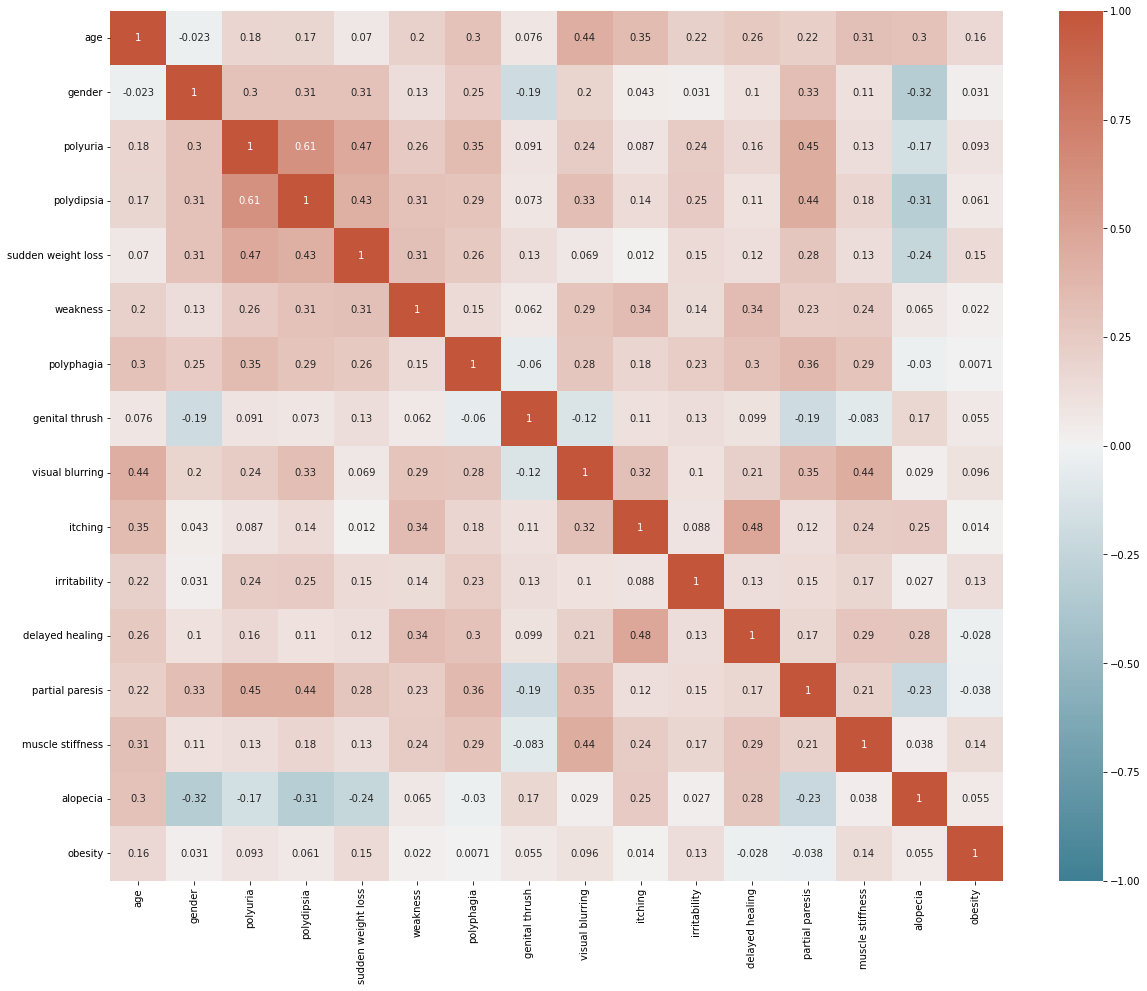

In [13]:
plt.figure(figsize=(20, 16))
sns.heatmap(corr:=df_train.corr(),
            vmin=-1,
            vmax=1,
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [14]:
from sklearn.feature_selection import chi2

In [15]:
categorical_vars = [col for col in df_train.columns if col not in ('age')]
chi_stat, p_value = chi2(df_train[categorical_vars], y_train)
p_value_df = pd.Series(p_value,index=categorical_vars)
p_value_df.sort_values(ascending=False)

itching               6.893127e-01
delayed healing       5.769436e-01
obesity               5.127059e-01
muscle stiffness      1.729739e-01
genital thrush        2.977744e-02
weakness              3.789147e-03
visual blurring       1.716424e-04
alopecia              4.084812e-06
polyphagia            1.451276e-06
irritability          1.206843e-06
partial paresis       3.661582e-11
sudden weight loss    2.736153e-13
polyuria              2.584194e-22
polydipsia            4.033327e-23
dtype: float64

In [16]:
p_value_df['muscle stiffness']

0.17297394118823511

In [17]:
p_value_df['genital thrush']

0.029777443977362268

### Evaluating feature importance of variables with ROC AUC

In [20]:
from sklearn.metrics import roc_auc_score
for var in df_train.columns:
    score = roc_auc_score(y_train, df_train[var])
    if score < 0.5:
        score = roc_auc_score(y_train, -df_train[var])
    print(f'{var:20}: {score}')

age                 : 0.5605254204335569
gender              : 0.7382861864489161
polyuria            : 0.8428842228054827
polydipsia          : 0.8346942743268203
sudden weight loss  : 0.7355156994264606
weakness            : 0.6121561193739672
polyphagia          : 0.6628268688636142
genital thrush      : 0.5490910858364927
visual blurring     : 0.6299941673957421
itching             : 0.5143141829493536
irritability        : 0.6190580344123652
delayed healing     : 0.519053173908817
partial paresis     : 0.7169971809079421
muscle stiffness    : 0.5414114902303878
alopecia            : 0.6372120151647711
obesity             : 0.5128074268494216


### Modelling: Logistic Regression

In [22]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(df_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [23]:
y_pred_proba = model.predict_proba(df_test)[:, 1]
roc_auc_score(y_test, y_pred_proba)

0.9832535885167464

In [26]:
y_pred = model.predict(df_test)
confusion_matrix(y_test, y_pred, labels=[0,1])

array([[34,  4],
       [ 5, 61]], dtype=int64)

In [27]:
print(f'Test Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Test Classification Report: \n {classification_report(y_test, y_pred)}')

Test Accuracy: 0.9134615384615384
Test Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88        38
           1       0.94      0.92      0.93        66

    accuracy                           0.91       104
   macro avg       0.91      0.91      0.91       104
weighted avg       0.91      0.91      0.91       104



### Modelling: Random Forest Classifier

In [30]:
rfc_params = {'n_estimators': 100,
               'max_features': 'auto',
               'max_depth': 10,
               'min_samples_split': 10,
               'min_samples_leaf': 2,
               'bootstrap': True}
rfc = RandomForestClassifier(**rfc_params, random_state=86431)
rfc.fit(df_train, y_train)

y_pred = rfc.predict(df_test)

In [31]:
confusion_matrix(y_test, y_pred, labels=[0,1])

array([[36,  2],
       [ 2, 64]], dtype=int64)

In [32]:
print(f'Test Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Test Classification Report: \n {classification_report(y_test, y_pred)}')

Test Accuracy: 0.9615384615384616
Test Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        38
           1       0.97      0.97      0.97        66

    accuracy                           0.96       104
   macro avg       0.96      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



#### Hyperparameter tuning

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in range(100,501,10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rfc = RandomForestClassifier()
rfc_random = RandomizedSearchCV(estimator = rfc, 
                                param_distributions = random_grid, 
                                n_iter = 100, 
                                cv = 5, 
                                verbose=2, 
                                random_state=86431)

# Fit the random search model
rfc_random.fit(df_train, y_train)

In [ ]:
rfc_random.best_params_

In [ ]:
rfc_random.best_score_

In [ ]:
rfc = RandomForestClassifier(**rfc_random.best_params_, random_state=86431)
rfc.fit(df_train, y_train)

y_pred = rfc.predict(df_test)

In [ ]:
confusion_matrix(y_test, y_pred, labels=[0,1])

In [ ]:
print(f'Test Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Test Classification Report: \n {classification_report(y_test, y_pred)}')

### Modelling: XGBoost Classifier

In [33]:
import xgboost as xgb

In [34]:
dtrain = xgb.DMatrix(data=df_train, label=y_train)
xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:hinge',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [35]:
dtest = xgb.DMatrix(data=df_test, label=y_test)
y_pred = model.predict(dtest)

In [36]:
confusion_matrix(y_test, y_pred, labels=[0,1])

array([[36,  2],
       [ 0, 66]], dtype=int64)

In [37]:
print(f'Test Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Test Classification Report: \n {classification_report(y_test, y_pred)}')

Test Accuracy: 0.9807692307692307
Test Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       0.97      1.00      0.99        66

    accuracy                           0.98       104
   macro avg       0.99      0.97      0.98       104
weighted avg       0.98      0.98      0.98       104

